In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def read_excel_file(file_name):
    df = pd.read_excel(file_name)
    return df
filename = "AA7449-75y.xls"
data1 = read_excel_file(filename)
# remove columns with all NaN values
data1 = data1.dropna(axis=1, how='all')
# remove unnamed columns
data1 = data1.loc[:, ~data1.columns.str.contains('^Unnamed')]
# remove rows with all NaN values
data1 = data1.dropna(axis=0, how='all')
cracks_all = data1.loc[:, data1.columns.str.contains('Crack')]
cracks_all["Time"] = data1["Time"]
cracks_all = cracks_all.loc[:, ~cracks_all.columns.str.contains('Velocity')]
cracks_all = cracks_all.loc[:, ~cracks_all.columns.str.contains("Length / µm")]
cracks_all = cracks_all.loc[:, ~cracks_all.columns.str.contains("(c/a = 1.5)")]
cracks_all.head()


C:\Users\borys\AppData\Local\Temp\ipykernel_11648\2210071547.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cracks_all = cracks_all.loc[:, ~cracks_all.columns.str.contains("(c/a = 1.5)")]


,Crack 1 Length / mm,Crack 2 Length / mm,Crack 3 Length / mm,Crack 4 Length / mm,Crack 5 Length / mm,Crack 6 Length / mm,Crack 7 Length / mm,Crack 8 Length / mm,Crack 9 Length / mm,Time
0,0.001,0.001,0.001,0.0001,0.0001,0.0001,0.0001,0.01,0.0001,0.000000
1,0.001,0.001,0.001,0.0001,0.0001,0.0001,0.0001,0.01,0.0001,3.358889
2,0.001,0.001,0.001,0.0001,0.0001,0.0001,0.0001,0.01,0.0001,6.663611
3,0.001,0.001,0.001,0.0001,0.0001,0.0001,0.0001,0.01,0.0001,9.940833
4,0.001,0.001,0.001,0.0001,0.0001,0.0001,0.0001,0.01,0.0001,13.218333


In [ ]:
for crack in cracks_all:
    if crack == "Time":
        break
    plt.plot(cracks_all["Time"], cracks_all[crack],'o')
    plt.title(crack)
    plt.xlabel("Time  [h]")
    plt.ylabel("Crack length  [mm]")
    plt.grid()
    plt.show()


In [ ]:
for crack in cracks_all:
    if crack == "Time":
        break
    plt.plot(cracks_all["Time"], cracks_all[crack], '-o',markersize=3, label=crack)
plt.title("All crack lengths vs time\n AA7085-85y")
plt.xlabel("Time [h]")
plt.ylabel("Crack Length [mm]")
plt.legend()
plt.grid()
plt.show()


In [ ]:
inc_times = []
for crack in cracks_all:
    if crack == "Time":
        break
    inc_times.append([cracks_all[cracks_all[crack] > 0.01]
                     ["Time"].iloc[0], cracks_all[crack].max()])
inc_times = np.array(inc_times)
inc_times


In [ ]:
pretty_presentation = pd.DataFrame(columns=["Crack", "Incubation Time[h]", "Final Length [mm]", "Arrested"])
i = 0
for crack in cracks_all:
    arr= False
    cag=[]
    if crack == "Time":
        break
    cag.append([cracks_all[cracks_all[crack]>0.01][crack],cracks_all[cracks_all[crack]>0.01]["Time"]])
    lvi = cag[0][0].last_valid_index()
    fvi = cag[0][0].first_valid_index()
    #getting rid of the points that are the same
    #to find the linear fit
    while cag[0][0][lvi] == cag[0][0][lvi-1]:
        lvi -= 1
        arr = True
    ### linear fit
    if fvi+5<lvi:
        lin_fit = np.polyfit(cracks_all["Time"][fvi+5:lvi],cracks_all[crack][fvi+5:lvi],1)
    else:
        lin_fit = np.polyfit(cracks_all["Time"][fvi:lvi],cracks_all[crack][fvi:lvi],1)
    lin_fit_fn = np.poly1d(lin_fit)
    #plot linear fit with data
    plt.figure()
    plt.plot(cracks_all["Time"],cracks_all[crack], 'o',markersize=3, label="data")
    plt.plot(cracks_all["Time"][fvi:lvi], lin_fit_fn(cracks_all["Time"][fvi:lvi]), '--', label="linear fit")
    plt.legend()
    plt.title(f"Crack {i+1} vs time \n AA7449-75y")
    plt.ylabel("Crack length [mm]")
    plt.xlabel("Time [h]")
    plt.grid()
    plt.xlim(0,230)
    plt.ylim(0,10)
    #plt.savefig(f"AA7085-85/crack{i+1}")
    plt.show()
    new_row = {"Crack": i+1, "Incubation Time[h]": inc_times[i][0], "Final Length [mm]": inc_times[i][1], "Arrested": arr}
    pretty_presentation=pretty_presentation.append(new_row, ignore_index=True)
    i += 1

    

In [ ]:
pretty_presentation.sort_values(by=["Incubation Time[h]"], inplace=True)
pretty_presentation


In [ ]:
print(pretty_presentation.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))

In [ ]:
velocities=[]
for crack in cracks_all:
    local_velocities=[]
    if crack == "Time":
        break
    for i in range(len(cracks_all[crack][1:-1])):
        v = (cracks_all[crack][i+1]-cracks_all[crack][i])/(cracks_all["Time"][i+1]-cracks_all["Time"][i])
        local_velocities.append(v)
    velocities.append(local_velocities)
    print(velocities)
for crack in cracks_all:
    i=0
    if crack == "Time":
        break
    plt.plot(cracks_all["Time"][1:-1],velocities[i], '-o',markersize=3, label=crack)
    plt.show()


In [ ]:
for crack in cracks_all:
    if crack == "Time":
        break
    plt.plot(cracks_all["Time"], np.gradient(cracks_all[crack],cracks_all["Time"], edge_order=2), '-o',markersize=3, label=crack)
    print(np.gradient(cracks_all[crack],cracks_all["Time"]))
    plt.show()

In [ ]:
import ruptures as rpt
for crack in cracks_all:
    if crack == "Time":
        break
    print(my_bkps)


In [ ]:
# creation of data
n, dim = 500, 3
n_bkps, sigma = 3, 1
signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)

# change point detection
model = "l1"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal)
my_bkps = algo.predict(pen=3)

# show results
fig, ax_arr = rpt.display(signal, bkps, my_bkps, figsize=(10, 6))
plt.show()


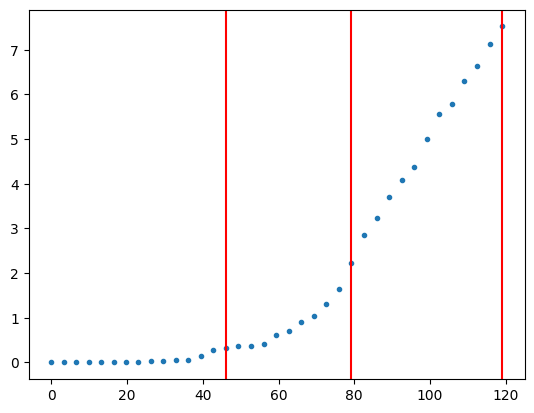

In [ ]:
crack1 = [cracks_all["Crack 5 Length / mm"],cracks_all["Time"]]
algo = rpt.Pelt(model="rbf").fit(np.array(cracks_all[crack]))
my_bkps = algo.predict(pen=3)
plt.plot(crack1[1],crack1[0], 'o',markersize=3, label="data")
for i in my_bkps:
    plt.axvline(x=crack1[1][i-1], color="red")
plt.show()

C:\Users\borys\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


(0.0, 4.0)

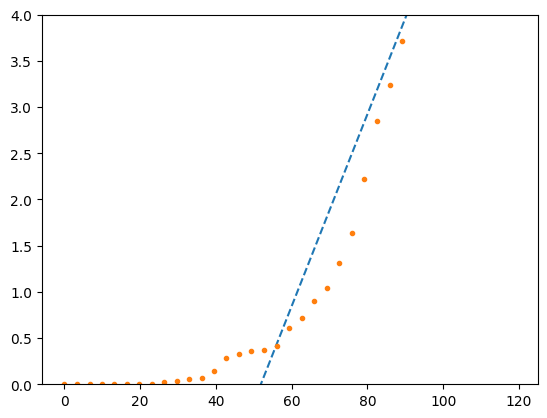

In [ ]:
r_vals =[]
fits=[]
for i in range(len(crack1[0])):
    if crack1[0][i]>0.01:
        fit = np.polyfit(crack1[1][i:],crack1[0][i:],1)
        fits.append(fit)
        corr = np.corrcoef(crack1[0][i:], fit[0]*crack1[1][i:]+fit[1])
        corr = corr[0,1]
        r_vals.append(corr)

plt.plot(crack1[1],crack1[1]*fits[5][0]+fits[5][1], '--',markersize=3, label="data")
plt.plot(crack1[1],crack1[0], 'o',markersize=3, label="data")
plt.ylim(0,4)